<a href="https://colab.research.google.com/github/MuhammadHabibna/MachineLearning/blob/main/13_K_Means_Clustering_Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# **K Means Clustering**



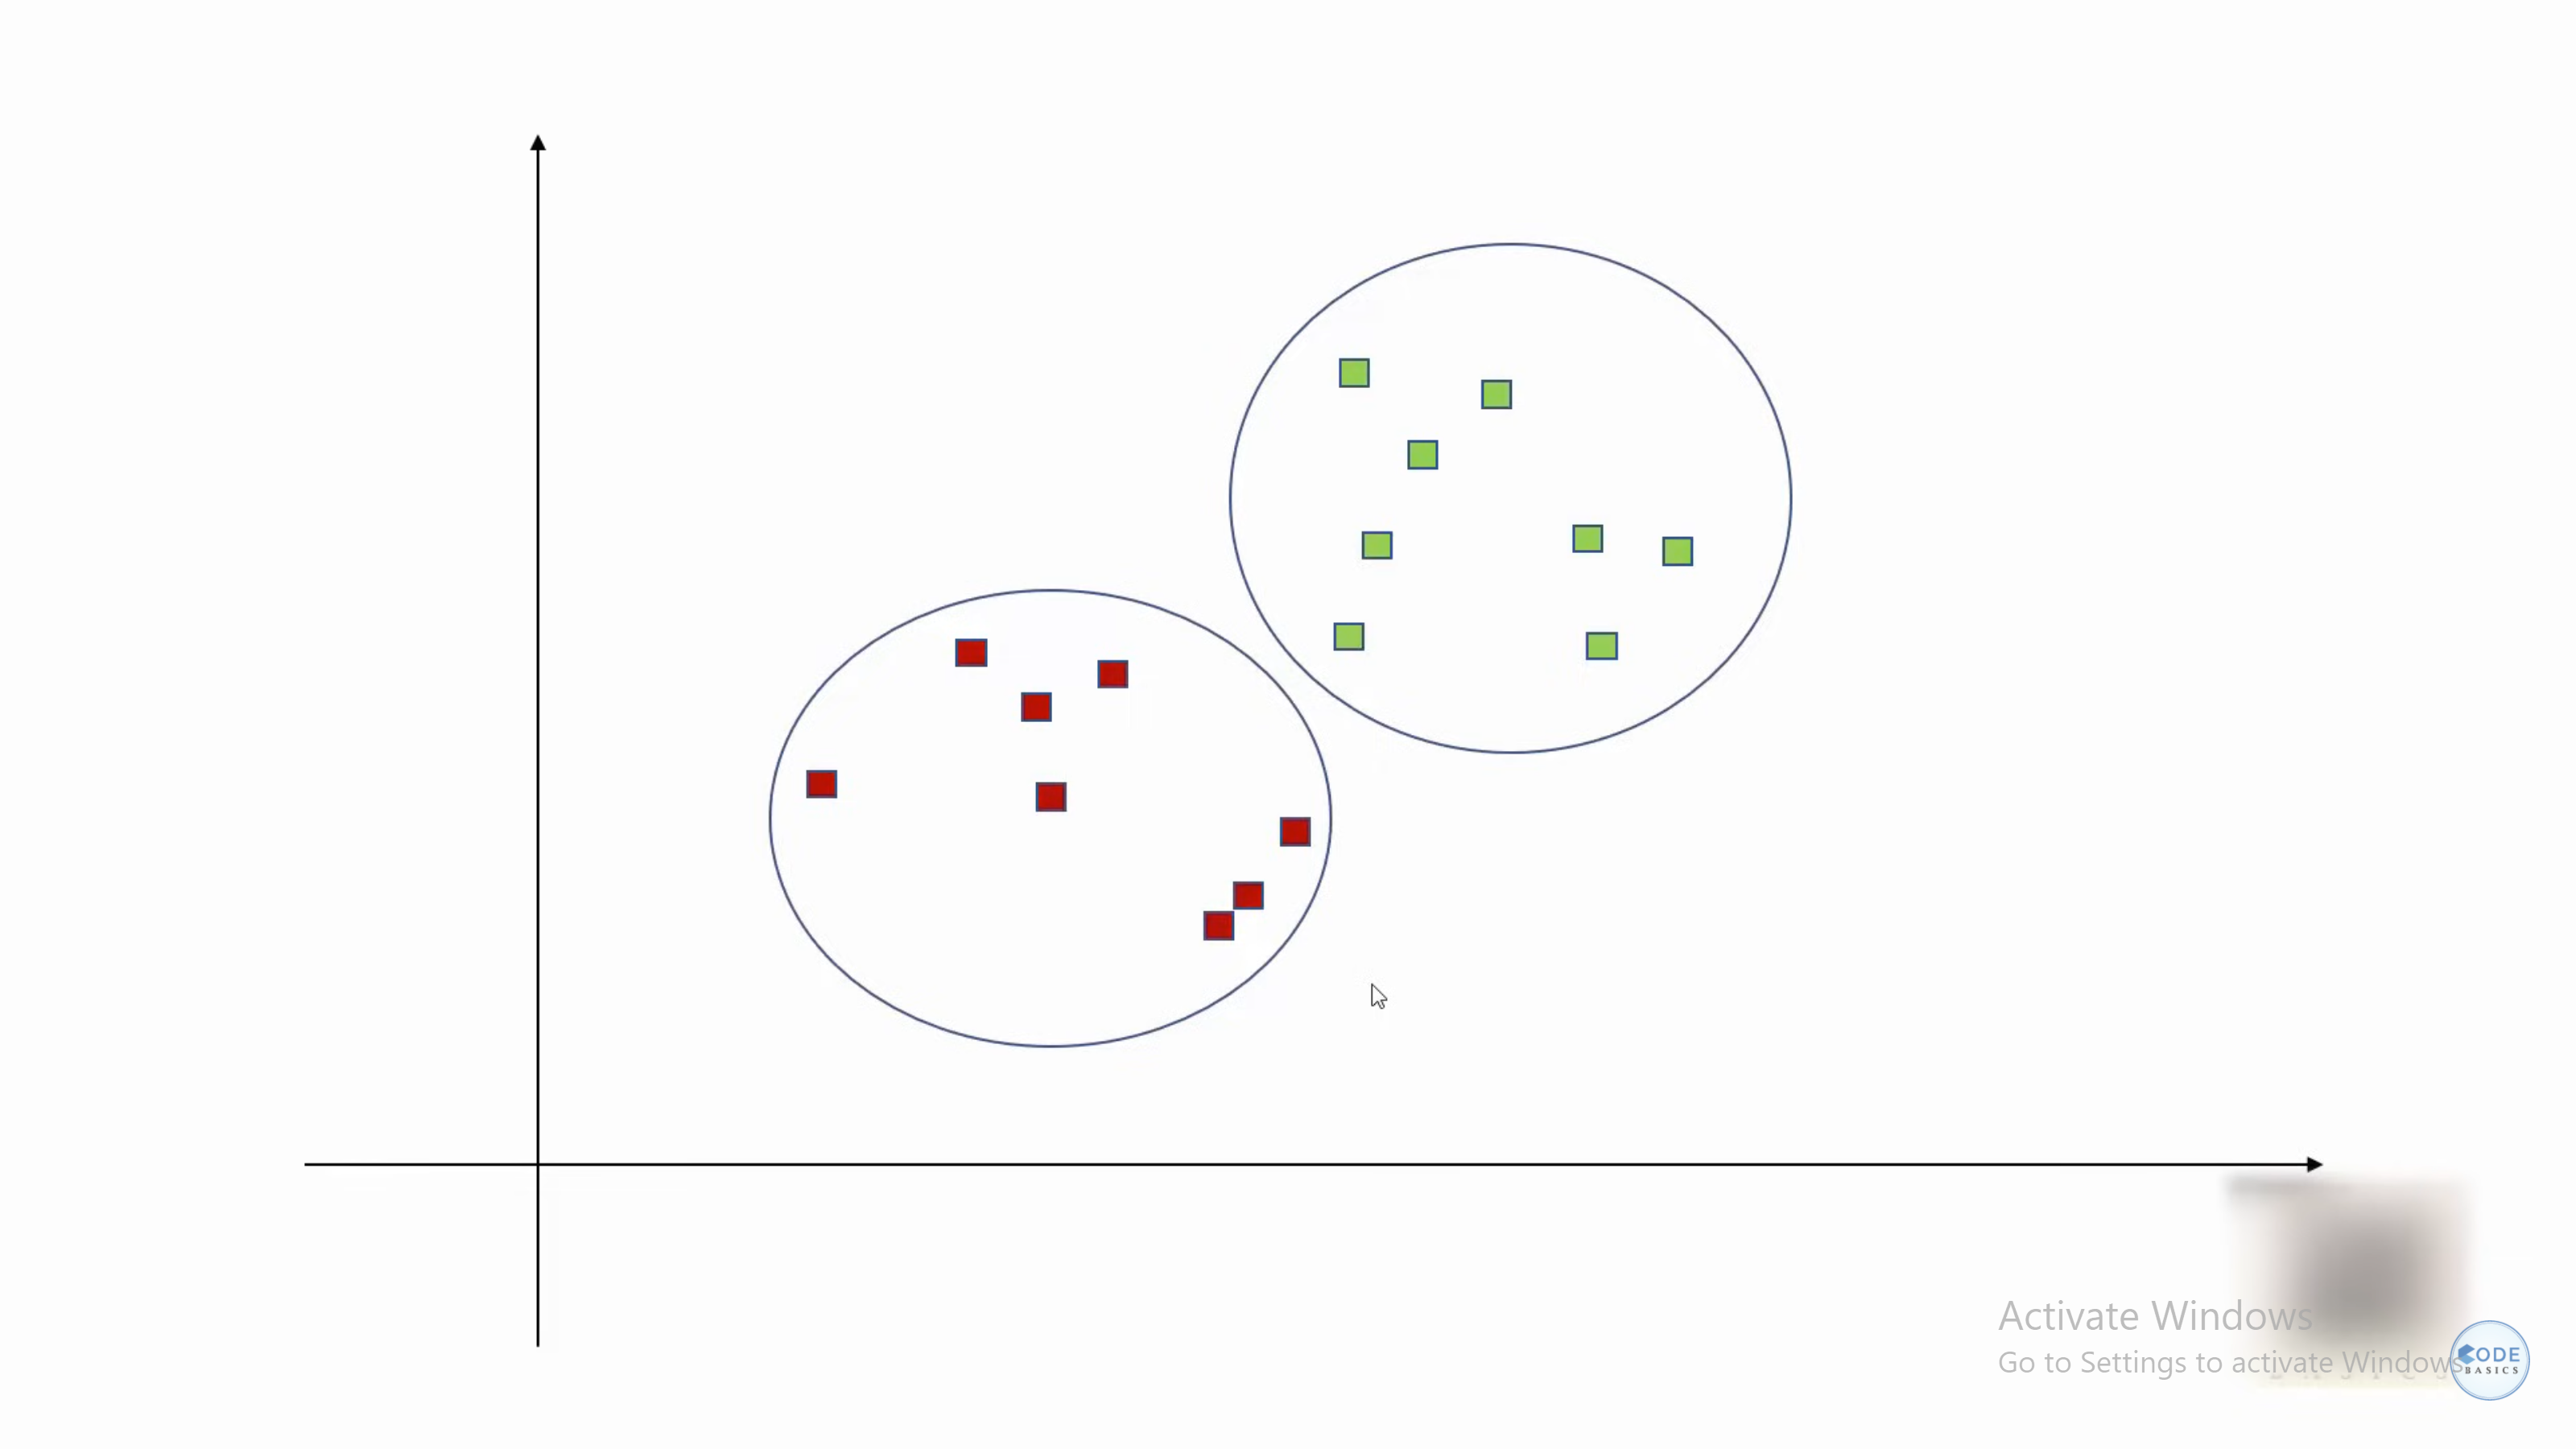

# **Elbow Technique**

menentukan nilai 'k' yang terbaik

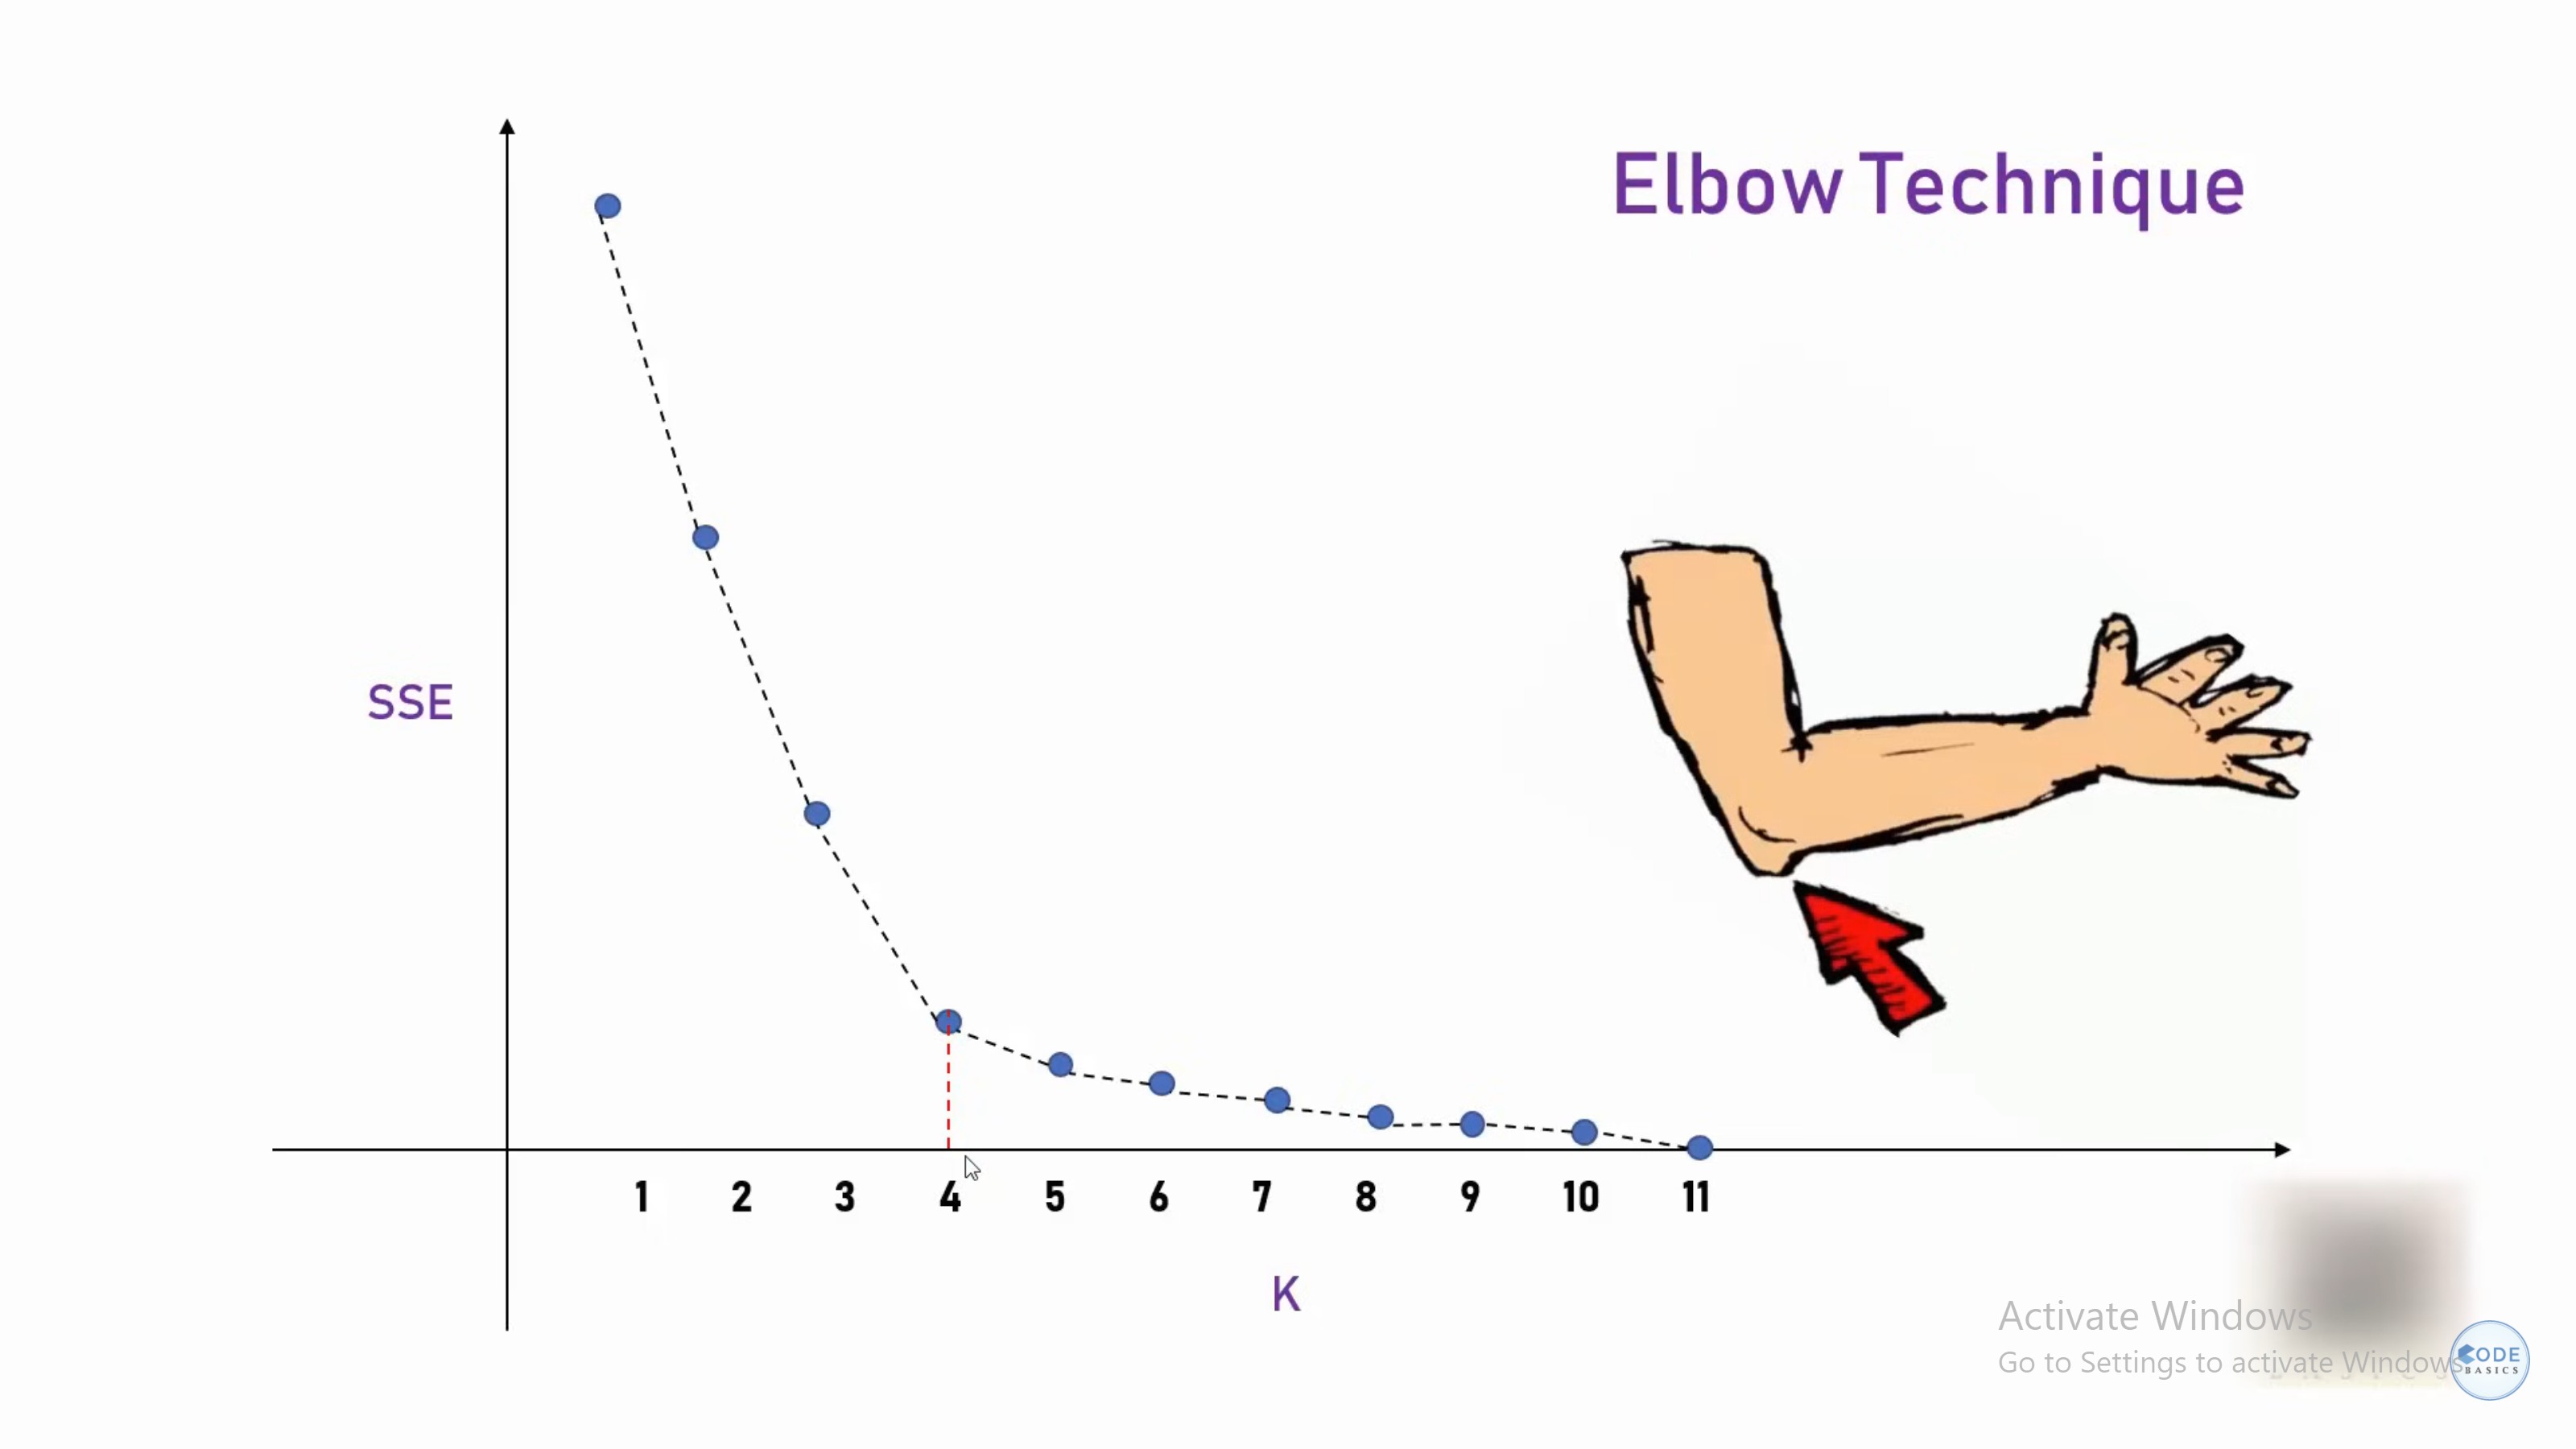

1. Use iris flower dataset from sklearn library and try to form clusters of flowers using petal width and length features. Drop other two features for simplicity.
1. Figure out if any preprocessing such as scaling would help here
1. Draw elbow plot and from that figure out optimal value of k



---
1. Gunakan kumpulan data bunga iris dari pustaka sklearn dan coba bentuk kelompok bunga menggunakan fitur lebar dan panjang kelopak. Hilangkan dua fitur lainnya demi kesederhanaan.
1. Cari tahu apakah praproses seperti penskalaan dapat membantu di sini.
1. Gambarkan plot siku dan dari situ cari tahu nilai k yang optimal.


In [24]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
%matplotlib inline

In [25]:
from sklearn.datasets import load_iris
iris = load_iris()

In [26]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [27]:
df.drop(['sepal length (cm)', 'sepal width (cm)'], axis='columns', inplace=True)
df

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
...,...,...
145,5.2,2.3
146,5.0,1.9
147,5.2,2.0
148,5.4,2.3


In [28]:
df

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
...,...,...
145,5.2,2.3
146,5.0,1.9
147,5.2,2.0
148,5.4,2.3


Text(0, 0.5, 'Petal Length')

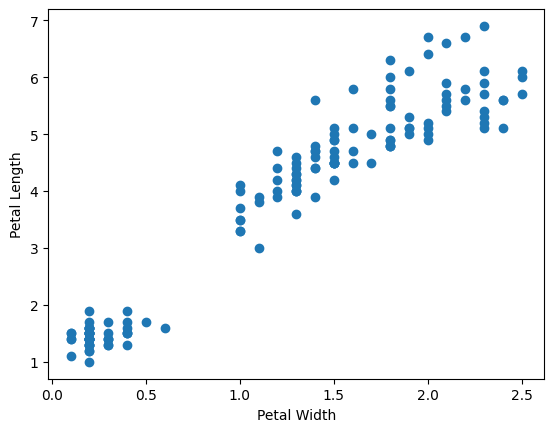

In [29]:
plt.scatter(df['petal width (cm)'], df['petal length (cm)'])
plt.xlabel('Petal Width')
plt.ylabel('Petal Length')
#

In [30]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['petal width (cm)', 'petal length (cm)']])
y_predicted

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [31]:
df['cluster'] = y_predicted
df.head()

,petal length (cm),petal width (cm),cluster
0,1.4,0.2,0
1,1.4,0.2,0
2,1.3,0.2,0
3,1.5,0.2,0
4,1.4,0.2,0


In [32]:
df1 = df[df['cluster'] == 0]
df2 = df[df['cluster'] == 1]
df3 = df[df['cluster'] == 2]

In [33]:
km.cluster_centers_ #(x, y)

array([[0.246     , 1.462     ],
       [2.0375    , 5.59583333],
       [1.34230769, 4.26923077]])

Text(0, 0.5, 'Petal Length')

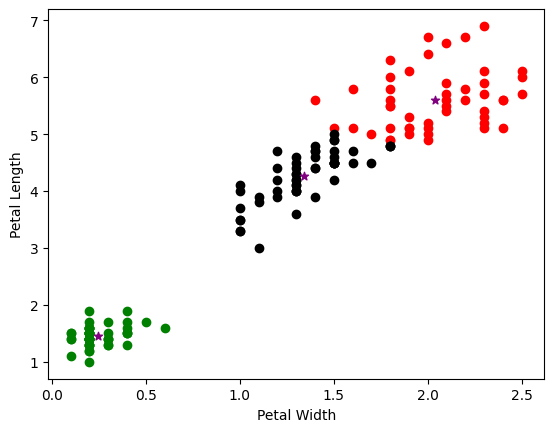

In [34]:
plt.scatter(df1['petal width (cm)'], df1['petal length (cm)'], color='green')
plt.scatter(df2['petal width (cm)'], df2['petal length (cm)'], color='red')
plt.scatter(df3['petal width (cm)'], df3['petal length (cm)'], color='black')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color='purple', marker='*', label='centroid')
plt.xlabel('Petal Width')
plt.ylabel('Petal Length')

# **Preprocessing using min max scaler**

(tidak perlu, biasanya digunakan ketika saat clustering ada data yang mencar biasanya disebabkan karena data yang besar)

In [19]:
# scaler = MinMaxScaler()

In [20]:
# scaler.fit(df[['petal length (cm)']])
# df['petal length (cm)'] = scaler.transform(df[['petal length (cm)']])

# scaler.fit(df[['petal width (cm)']])
# df['petal width (cm)'] = scaler.transform(df[['petal width (cm)']])

In [35]:
df.head()

,petal length (cm),petal width (cm),cluster
0,1.4,0.2,0
1,1.4,0.2,0
2,1.3,0.2,0
3,1.5,0.2,0
4,1.4,0.2,0


# **ELBOW PLOT**



> Mencari nilai 'K' yang terbaik



In [36]:
sse = [] #sum of squared error
k_range = range(1,11) # k = 1 sampai 10
for k in k_range:
  km = KMeans(n_clusters=k)
  km.fit(df[['petal width (cm)', 'petal length (cm)']])
  sse.append(km.inertia_) #inertia akan menghasilkan sse(sum of squared error)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

In [37]:
sse

[550.8953333333333,
 86.39021984551391,
 31.371358974358966,
 19.46598901098901,
 13.91690875790876,
 11.02514511025038,
 9.19386673204751,
 7.716338763575605,
 6.561642857142855,
 5.608258277670041]

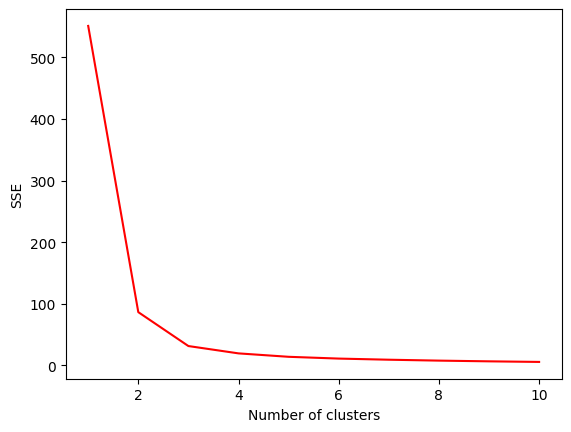

In [40]:
plt.plot(k_range, sse, 'r-')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

# **BEST "K" = 3**

STEP :


1.   MENCARI K TERBAIK
2.   BUAT VISUALISASI DENGAN MEMISAHKAN ANTARA DATA SESUSAI N_CLUSTER = K
3. JIKA ADA DATA YANG MENCAR
4. DATA HARUS DI SCALER (MINMAX SCALER)

